In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.stats import wasserstein_distance

# DRIAMS-B

In [16]:
a = [1,0,0]
b = [0,1,2]
xx = [i for i in range(len(a))]
wasserstein_distance(xx, xx, b, a)

1.6666666666666667

In [14]:
mat = np.load("../data/DRIAMS-B/spectra_binned_6000_2018.npy")
mat.shape

(2384, 6000)

In [10]:
df = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
df = df[df["dataset"]=="B"]
df

,species,sample_id,drug,response,dataset
474238,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Amikacin,0,B
474239,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Ampicillin,1,B
474240,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Cefepime,0,B
474241,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Cefoxitin,0,B
474242,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Ceftazidime,0,B
...,...,...,...,...,...
506610,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Rifampicin,0,B
506611,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Teicoplanin,0,B
506612,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Tetracycline,0,B
506613,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Tigecycline,0,B


In [12]:
samples_list = sorted(list(df["sample_id"].unique()))
len(samples_list)

2384

In [18]:
xx = np.arange(6000)

dist_matrix = np.zeros((len(samples_list), len(samples_list)))

for i in tqdm(range(len(samples_list))):
    for j in range(i+1, len(samples_list)):
        d1 = wasserstein_distance(xx, xx, mat[i,:], mat[j,:])
        dist_matrix[i, j] = d1
        dist_matrix[j, i] = d1


  0%|          | 0/2384 [00:00<?, ?it/s]

In [19]:
dist_matrix

array([[  0.        , 176.9108729 , 203.87071831, ..., 116.19638591,
        175.30549955, 142.69889561],
       [  0.        ,   0.        , 198.33477942, ..., 183.31653835,
        246.58466028, 114.34640322],
       [  0.        ,   0.        ,   0.        , ..., 115.05072427,
         97.54688068, 110.28974771],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         99.6180866 ,  93.06452596],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 132.93329036],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [20]:
len(df["species"].unique())

103

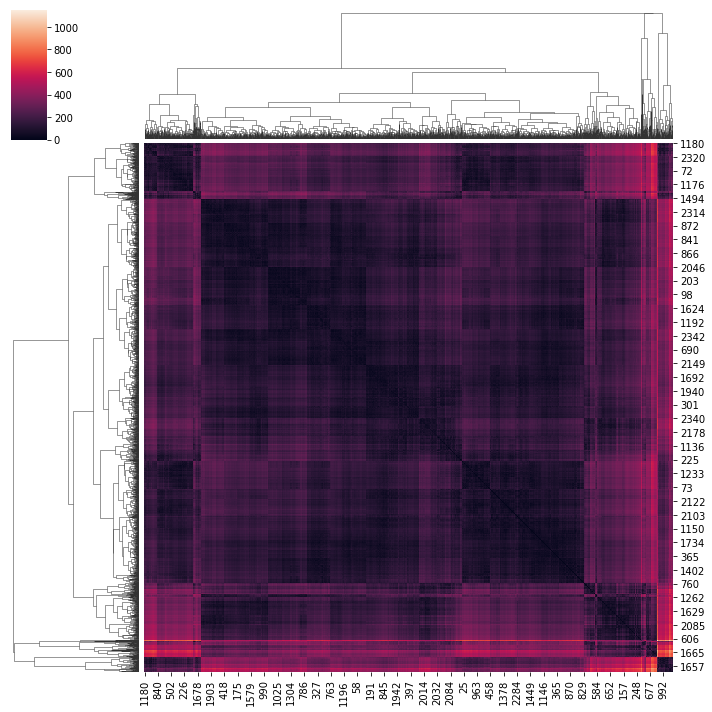

In [24]:
sns.clustermap(dist_matrix)

In [23]:
for i in tqdm(range(len(samples_list))):
    for j in range(i+1, len(samples_list)):
        dist_matrix[j, i] = dist_matrix[i,j]

  0%|          | 0/2384 [00:00<?, ?it/s]